In [2]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.metrics import log_loss
from google.colab import files

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lectura y Filtrado

In [4]:
df = pd.read_csv( "/content/drive/MyDrive/Orga Datos/TP2/Training.csv" )
df

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245

In [5]:
df.loc[df['Total_Amount_Currency'] == 'JPY', 'Total_Amount'] = df['Total_Amount']*0.0096
df.loc[df['Total_Amount_Currency'] == 'JPY', 'Total_Amount_Currency'] = 'USD'

df.loc[df['Total_Amount_Currency'] == 'EUR', 'Total_Amount'] = df['Total_Amount']*1.17
df.loc[df['Total_Amount_Currency'] == 'EUR', 'Total_Amount_Currency'] = 'USD'

df.loc[df['Total_Amount_Currency'] == 'AUD', 'Total_Amount'] = df['Total_Amount']*0.70
df.loc[df['Total_Amount_Currency'] == 'AUD', 'Total_Amount_Currency'] = 'USD'

df.loc[df['Total_Amount_Currency'] == 'GBP', 'Total_Amount'] = df['Total_Amount']*1.29
df.loc[df['Total_Amount_Currency'] == 'GBP', 'Total_Amount_Currency'] = 'USD'

In [6]:
short_df = df[['Region', 'Delivery_Quarter','Stage',  'Bureaucratic_Code', 'Total_Amount']].rename(columns={'Stage': 'Decision'})
short_df = short_df[ (short_df['Decision'] == 'Closed Won') | (short_df['Decision'] == 'Closed Lost') ]
short_df['Decision'] = np.where(short_df['Decision'] == 'Closed Won',1,0)
short_df.dropna(inplace=True)

In [7]:
test = pd.read_csv( "/content/drive/MyDrive/Orga Datos/TP2/Test.csv" )
test

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A
0,6140,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_171,Product_Name_332,EUR,0.325,USD,0.36761,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,162240.0,EUR,367419.0,Prod_Category_A_None
1,6146,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_167,Product_Name_315,EUR,0.320,USD,0.36195,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,78624.0,EUR,367419.0,Prod_Category_A_None
2,6151,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_140,Product_Name_241,EUR,0.275,USD,0.31105,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,126555.0,EUR,367419.0,Prod_Category_A_None
3,6118,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6117,10690,6504,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/25/2019,Person_Name_13,Product_Family_171,Product_Name_328,EUR,0.325,USD,0.36761,6/1/2019,6/28/2019,2019 - 6,Q2,2019,NaT,1,EUR,243360.0,EUR,757783.5,Prod_Category_A_None
4,6124,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6117,10690,6504,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/25/2019,Person_Name_13,Product_Family_167,Product_Name_315,EUR,0.320,USD,0.36195,6/1/2019,6/29/2019,2019 - 6,Q2,2019,NaT,0,EUR,157248.0,EUR,757783.5,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,16345,EMEA,KSA,1,1,0,0,0,Bureaucratic_Code_4,6/12/2017,Source_3,South Africa,Account_Name_1686,Opportunity_Name_11120,12364,6508,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_7,4/26/2019,None,None,None,None,None,None,NaT,5/24/2019,4/26/2019,Person_Name_13,Product_Family_213,Product_Name_447,USD,0.300,USD,0.30000,5/1/2019,5/10/2019,2019 - 5,Q2,2019,NaT,0,USD,124740.0,USD,147750.0,Prod_Category_A_None
2547,15218,Americas,SE America,1,1,0,0,0,Bureaucratic_Code_4,6/8/2018,None,United States,Account_Name_768,Opportunity_Name_9694,12365,6510,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,4/26/2019,None,None,None,None,None,None,N

In [8]:
test.loc[test['Total_Amount_Currency'] == 'JPY', 'Total_Amount'] = test['Total_Amount']*0.0096
test.loc[test['Total_Amount_Currency'] == 'JPY', 'Total_Amount_Currency'] = 'USD'

test.loc[test['Total_Amount_Currency'] == 'EUR', 'Total_Amount'] = test['Total_Amount']*1.17
test.loc[test['Total_Amount_Currency'] == 'EUR', 'Total_Amount_Currency'] = 'USD'

test.loc[test['Total_Amount_Currency'] == 'AUD', 'Total_Amount'] = test['Total_Amount']*0.70
test.loc[test['Total_Amount_Currency'] == 'AUD', 'Total_Amount_Currency'] = 'USD'

test.loc[test['Total_Amount_Currency'] == 'GBP', 'Total_Amount'] = test['Total_Amount']*1.29
test.loc[test['Total_Amount_Currency'] == 'GBP', 'Total_Amount_Currency'] = 'USD'

In [9]:
short_test = test[['Region', 'Delivery_Quarter',  'Bureaucratic_Code', 'Total_Amount']]
short_test.dropna(inplace=True)
#\.rename(columns={'Stage': 'Decision'})
#short_test['Decision'] = np.where(short_test['Decision'] == 'Closed Won',1,0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Encoding


In [10]:
short_df['Delivery_Quarter_1'] = np.where(short_df['Delivery_Quarter'] == 'Q1',1,0)
short_df['Delivery_Quarter_2'] = np.where(short_df['Delivery_Quarter'] == 'Q2',1,0)
short_df['Delivery_Quarter_3'] = np.where(short_df['Delivery_Quarter'] == 'Q3',1,0)
short_df['Delivery_Quarter_4'] = np.where(short_df['Delivery_Quarter'] == 'Q4',1,0)
short_df.drop('Delivery_Quarter', axis = 1, inplace = True)

In [11]:
short_df['Region_Japon'] = np.where(short_df['Region'] == 'Japan',1,0)
short_df['Region_EMEA '] = np.where(short_df['Region'] == 'EMEA',1,0)
short_df['Region_Americas'] = np.where(short_df['Region'] == 'Americas',1,0)
short_df['Region_Apac'] = np.where(short_df['Region'] == 'APAC',1,0)
short_df['Region_Middle_East'] = np.where(short_df['Region'] == 'Middle East',1,0)
short_df.drop('Region', axis = 1, inplace = True)

In [12]:
short_df['Bureaucratic_Code_1'] = np.where(short_df['Bureaucratic_Code'] == 'Bureaucratic_Code_1',1,0)
short_df['Bureaucratic_Code_2'] = np.where(short_df['Bureaucratic_Code'] == 'Bureaucratic_Code_2',1,0)
short_df['Bureaucratic_Code_3'] = np.where(short_df['Bureaucratic_Code'] == 'Bureaucratic_Code_3',1,0)
short_df['Bureaucratic_Code_4'] = np.where(short_df['Bureaucratic_Code'] == 'Bureaucratic_Code_4',1,0)
short_df['Bureaucratic_Code_5'] = np.where(short_df['Bureaucratic_Code'] == 'Bureaucratic_Code_5',1,0)
short_df.drop('Bureaucratic_Code', axis = 1, inplace = True)

In [13]:
short_df['Total_Amount'].value_counts()

5.952000e+01    513
4.224000e+01    460
1.728000e+02    351
1.344000e+03    272
1.536000e+01    204
               ... 
1.075200e+04      1
6.869055e+05      1
3.163680e+04      1
1.373772e+06      1
5.330812e+04      1
Name: Total_Amount, Length: 9298, dtype: int64

In [14]:
short_df = short_df[ short_df['Total_Amount'] > 0 ]
short_df

,Decision,Total_Amount,Delivery_Quarter_1,Delivery_Quarter_2,Delivery_Quarter_3,Delivery_Quarter_4,Region_Japon,Region_EMEA,Region_Americas,Region_Apac,Region_Middle_East,Bureaucratic_Code_1,Bureaucratic_Code_2,Bureaucratic_Code_3,Bureaucratic_Code_4,Bureaucratic_Code_5
0,0,6169176.00,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,1,56429.10,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,1,83865.60,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0,7421881.50,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,13357192.50,1,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,1,120919.50,1,0,0,0,0,1,0,0,0,0,0,0,1,0
16943,1,108827.55,0,1,0,0,0,1,0,0,0,0,0,0,1,0
16944,1,120919.50,1,0,0,0,0,1,0,0,0,0,0,0,1,0
16945,0,2346796.88,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [15]:
short_df['Total_Amount'] = np.log(short_df.Total_Amount)

In [16]:
short_df.isnull().sum()

Decision               0
Total_Amount           0
Delivery_Quarter_1     0
Delivery_Quarter_2     0
Delivery_Quarter_3     0
Delivery_Quarter_4     0
Region_Japon           0
Region_EMEA            0
Region_Americas        0
Region_Apac            0
Region_Middle_East     0
Bureaucratic_Code_1    0
Bureaucratic_Code_2    0
Bureaucratic_Code_3    0
Bureaucratic_Code_4    0
Bureaucratic_Code_5    0
dtype: int64

In [17]:
short_df.dropna(inplace=True)

In [18]:
short_df

,Decision,Total_Amount,Delivery_Quarter_1,Delivery_Quarter_2,Delivery_Quarter_3,Delivery_Quarter_4,Region_Japon,Region_EMEA,Region_Americas,Region_Apac,Region_Middle_East,Bureaucratic_Code_1,Bureaucratic_Code_2,Bureaucratic_Code_3,Bureaucratic_Code_4,Bureaucratic_Code_5
0,0,15.635076,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,1,10.940740,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,1,11.336971,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0,15.819943,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,16.407566,1,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,1,11.702880,1,0,0,0,0,1,0,0,0,0,0,0,1,0
16943,1,11.597520,0,1,0,0,0,1,0,0,0,0,0,0,1,0
16944,1,11.702880,1,0,0,0,0,1,0,0,0,0,0,0,1,0
16945,0,14.668562,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
short_test['Delivery_Quarter_1'] = np.where(short_test['Delivery_Quarter'] == 'Q1',1,0)
short_test['Delivery_Quarter_2'] = np.where(short_test['Delivery_Quarter'] == 'Q2',1,0)
short_test['Delivery_Quarter_3'] = np.where(short_test['Delivery_Quarter'] == 'Q3',1,0)
short_test['Delivery_Quarter_4'] = np.where(short_test['Delivery_Quarter'] == 'Q4',1,0)
short_test.drop('Delivery_Quarter', axis = 1, inplace = True)

short_test['Region_Japon'] = np.where(short_test['Region'] == 'Japan',1,0)
short_test['Region_EMEA '] = np.where(short_test['Region'] == 'EMEA',1,0)
short_test['Region_Americas'] = np.where(short_test['Region'] == 'Americas',1,0)
short_test['Region_Apac'] = np.where(short_test['Region'] == 'APAC',1,0)
short_test['Region_Middle_East'] = np.where(short_test['Region'] == 'Middle East',1,0)
short_test.drop('Region', axis = 1, inplace = True)

short_test['Bureaucratic_Code_1'] = np.where(short_test['Bureaucratic_Code'] == 'Bureaucratic_Code_1',1,0)
short_test['Bureaucratic_Code_2'] = np.where(short_test['Bureaucratic_Code'] == 'Bureaucratic_Code_2',1,0)
short_test['Bureaucratic_Code_3'] = np.where(short_test['Bureaucratic_Code'] == 'Bureaucratic_Code_3',1,0)
short_test['Bureaucratic_Code_4'] = np.where(short_test['Bureaucratic_Code'] == 'Bureaucratic_Code_4',1,0)
short_test['Bureaucratic_Code_5'] = np.where(short_test['Bureaucratic_Code'] == 'Bureaucratic_Code_5',1,0)
short_test.drop('Bureaucratic_Code', axis = 1, inplace = True)

short_test['Total_Amount'] = short_test[ short_test['Total_Amount'] > 0 ]
short_test['Total_Amount'] = np.log(short_test.Total_Amount)

# Split

In [20]:
X = short_df.drop( 'Decision', axis=1 )
y = short_df['Decision']
X

,Total_Amount,Delivery_Quarter_1,Delivery_Quarter_2,Delivery_Quarter_3,Delivery_Quarter_4,Region_Japon,Region_EMEA,Region_Americas,Region_Apac,Region_Middle_East,Bureaucratic_Code_1,Bureaucratic_Code_2,Bureaucratic_Code_3,Bureaucratic_Code_4,Bureaucratic_Code_5
0,15.635076,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,10.940740,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,11.336971,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,15.819943,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,16.407566,1,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,11.702880,1,0,0,0,0,1,0,0,0,0,0,0,1,0
16943,11.597520,0,1,0,0,0,1,0,0,0,0,0,0,1,0
16944,11.702880,1,0,0,0,0,1,0,0,0,0,0,0,1,0
16945,14.668562,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [22]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression(fit_intercept=False)


In [23]:
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [24]:
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
LinReg_pred = regr.predict(X_test)

In [25]:
loss = log_loss(y_test, LinReg_pred)
print(f"Log loss is {loss}")

Log loss is 0.609686948534489


In [26]:
pred_test = regr.predict( short_test )
pred_test

array([0.59187963, 0.62909857, 0.60464216, ..., 0.60784587, 0.55124206,
       0.19418401])

In [27]:
resultado = pd.DataFrame()
resultado['Opportunity_ID'] = test['Opportunity_ID']
resultado['target'] = pred_test
resultado.sort_values('Opportunity_ID',inplace = True)
resultado = resultado.drop_duplicates('Opportunity_ID',keep = 'last')
resultado.set_index('Opportunity_ID', inplace = True)

In [28]:
csv3 = resultado.to_csv('LinearRegression.csv')
#files.download('LinearRegression.csv')

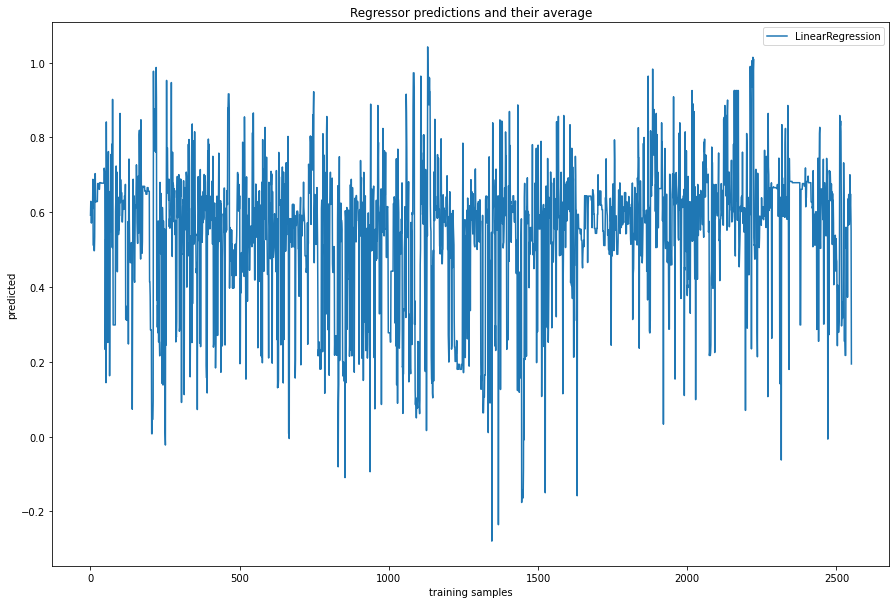

In [53]:
plt.figure(figsize=(15,10))
plt.plot(pred_test, label='LinearRegression')

#plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()